# <center> Overfitting </center>

# What is it?
* Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This

# What are the consequences?
* The most obvious consequence of overfitting is poor performance on the validation dataset. 
* A function that is overfitted is likely to request more information about each item in the validation dataset than does the optimal function; gathering this additional unneeded data can be expensive or error-prone, especially if each individual piece of information must be gathered by human observation and manual data-entry.
* A more complex, overfitted function is likely to be less portable than a simple one. 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.random as rng
import numpy as np
plt.style.use('ggplot')
save_path = "/Users/matt/University/writeUps/Mres/images/method/overfit/"

PARAMETERS 

In [2]:
N = 50 # number of obs in train set
FIG_SIZE = (15,10)
MODEL_1_DEG = 3
MODEL_2_DEG = 30
MODEL_3_DEG = 6
std = 0.3

# Make a function to estimate (truth)

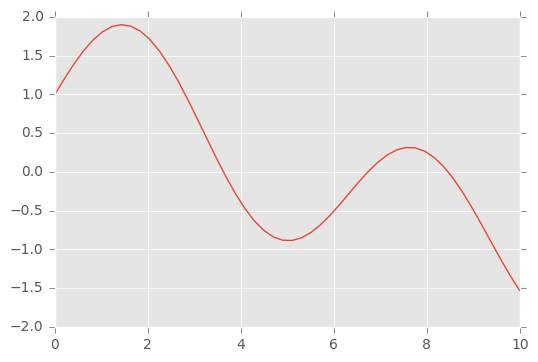

In [3]:
x = np.linspace(0,10,N)
f = lambda x: np.sin(x) + np.cos(0.3*x)
f_x = f(x)
plt.plot(x,f_x)
plt.show()

# Make observations from $f(x)$ with noise

In [4]:
std = 0.3
f_observed = f(x) + rng.normal(0,std,N)
plt.figure(figsize=FIG_SIZE)
plt.plot(x,f_x,label="f(x)",c='#000000',linestyle='dashed')
plt.scatter(x,f_observed,c="black"); 
plt.xlabel("x");plt.ylabel("y")
plt.legend()
plt.savefig(savepath+"overfitting_true_function.png")
plt.show()


NameError: name 'savepath' is not defined

# Try to estimate function with polynomial

### Make poly class

In [ ]:
class Poly_fn():
    def __init__(self,degree):
        self.degree = degree
    def fit(self,x,y):
        self.model = np.poly1d(np.polyfit(x,y,self.degree))
    def predict(self,x):
        return self.model(x)

### Fit polys and predict 

In [ ]:
model1 = Poly_fn(MODEL_1_DEG)
model2 = Poly_fn(MODEL_2_DEG)
model3 = Poly_fn(MODEL_3_DEG)
model1.fit(x,f_observed)
model2.fit(x,f_observed)
model3.fit(x,f_observed)

x_fit = np.linspace(0,10,1000)
model1_predicted = model1.predict(x_fit)
model2_predicted = model2.predict(x_fit)
model3_predicted = model3.predict(x_fit)

plt.figure(figsize=FIG_SIZE)
plt.plot(x_fit,model1_predicted,label="Model 1",c='#6600ff'); 
plt.plot(x_fit,model2_predicted,label="Model 2",c='#cc0099'); 
plt.plot(x_fit,model3_predicted,label="Model 3",c='#0099ff'); 
#plt.plot(x,f_x,label="f(x)",c='#000000',linestyle='dashed'); 
plt.scatter(x,f_observed,c="black",alpha=0.5); 
plt.xlabel("x");plt.ylabel("y")
plt.legend()
plt.savefig(save_path+"overfitting_train.png")
plt.show()

# Make loss function $\Sigma_i \frac{(y_i^{true} - y_i^{pred})^2}{n}$

In [ ]:
def mse(y_true,y_pred):
    return np.mean(np.square(y_true - y_pred))

# Train errors

In [ ]:
train_errors = [mse(f_observed,fitted) for fitted in [model1.predict(x),model2.predict(x),model3.predict(x)]]
print("Train errors", train_errors)

# Make a test set

In [ ]:
N_TEST = 500
x_test = np.linspace(0,10,N_TEST) # test set is just more observations
f_x_test = f(x_test) # ideal function
f_observed_test = f_x_test + rng.normal(0,std,N_TEST)

model1_predicted_te = model1.predict(x_test)
model2_predicted_te = model2.predict(x_test)
model3_predicted_te = model3.predict(x_test)

test_errors = [mse(f_observed_test,fitted) for fitted in [model1_predicted_te,model2_predicted_te,model3_predicted_te]]
print(test_errors)

plt.figure(figsize=FIG_SIZE)
plt.plot(x_test,model1_predicted_te,label="Model 1",c='#6600ff'); 
plt.plot(x_test,model2_predicted_te,label="Model 2",c='#cc0099'); 
plt.plot(x_test,model3_predicted_te,label="Model 3",c='#0099ff'); 
#plt.plot(x_test,f_x_test,label="f(x)",c='#000000',linestyle='dashed'); 
plt.scatter(x_test,f_observed_test,c="black",alpha=0.2);
plt.xlabel("x");plt.ylabel("y")
plt.legend()
plt.savefig(save_path+"overfitting_test.png")
plt.show()